### grp

# Course: _Dimensionality Reduction in Python_:
1.  high dimensional data
2.  feature selection part 1
3.  feature selection part 2
4.  feature extraction

## _1. Exploring High Dimensional Data_:
-  more than 10 columns is considered high dimensional data

#### why perform dimensionality reduction?:
-  data is less complex
-  data requires less ram and disk space
-  data requires less compute time
-  data is less likely to overfit and generalize well to unseen data

#### feature selection vs feature extraction:
-  feature selection selects a subset of features from the feature space
-  feature extraction extracts and creates new features from the feature space

#### T-SNE:
- method to visualize feature extraction
-  helps identify variance in dataset and relationships among variables
-  useful for identify patterns in the data
-  **learning_rate** (usually between 10 and 1000):
	-  higher value makes algorithm more adventurous
	-  lower value makes algorithm more conservative

#### data shape

In [1]:
PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/pokemon.csv"

In [2]:
import pandas as pd
pokemon_df = pd.read_csv(PATH)

In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon_df.shape

(800, 13)

#### describe data and remove columns w/o variance

In [5]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
number_cols = ['HP', 'Attack', 'Defense'] # dropped "Generation"

pokemon_df.describe(exclude="number")

non_number_cols = ['Name', 'Type 1'] # dropped "Legendary"
 
df_selected = pokemon_df[number_cols + non_number_cols]

df_selected.head()

,HP,Attack,Defense,Name,Type 1
0,45,49,49,Bulbasaur,Grass
1,60,62,63,Ivysaur,Grass
2,80,82,83,Venusaur,Grass
3,80,100,123,VenusaurMega Venusaur,Grass
4,39,52,43,Charmander,Fire


#### visualize features

In [7]:
MALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_MALE.csv"
ansur_male_df = pd.read_csv(MALE_PATH, usecols=["Gender",\
                                           "weight_kg",\
                                           "stature_m",
                                           "BMI",\
                                           "footlength",\
                                           "headlength"])[:100]

FEMALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_FEMALE.csv"
ansur_female_df = pd.read_csv(FEMALE_PATH, usecols=["Gender",\
                                             "weight_kg",\
                                             "stature_m",\
                                             "BMI",\
                                             "footlength",\
                                             "headlength"])[:100]

ansur_df = pd.concat([ansur_male_df, ansur_female_df])
ansur_df['n_legs'] = 2.0 # adding redudant feature to visualize

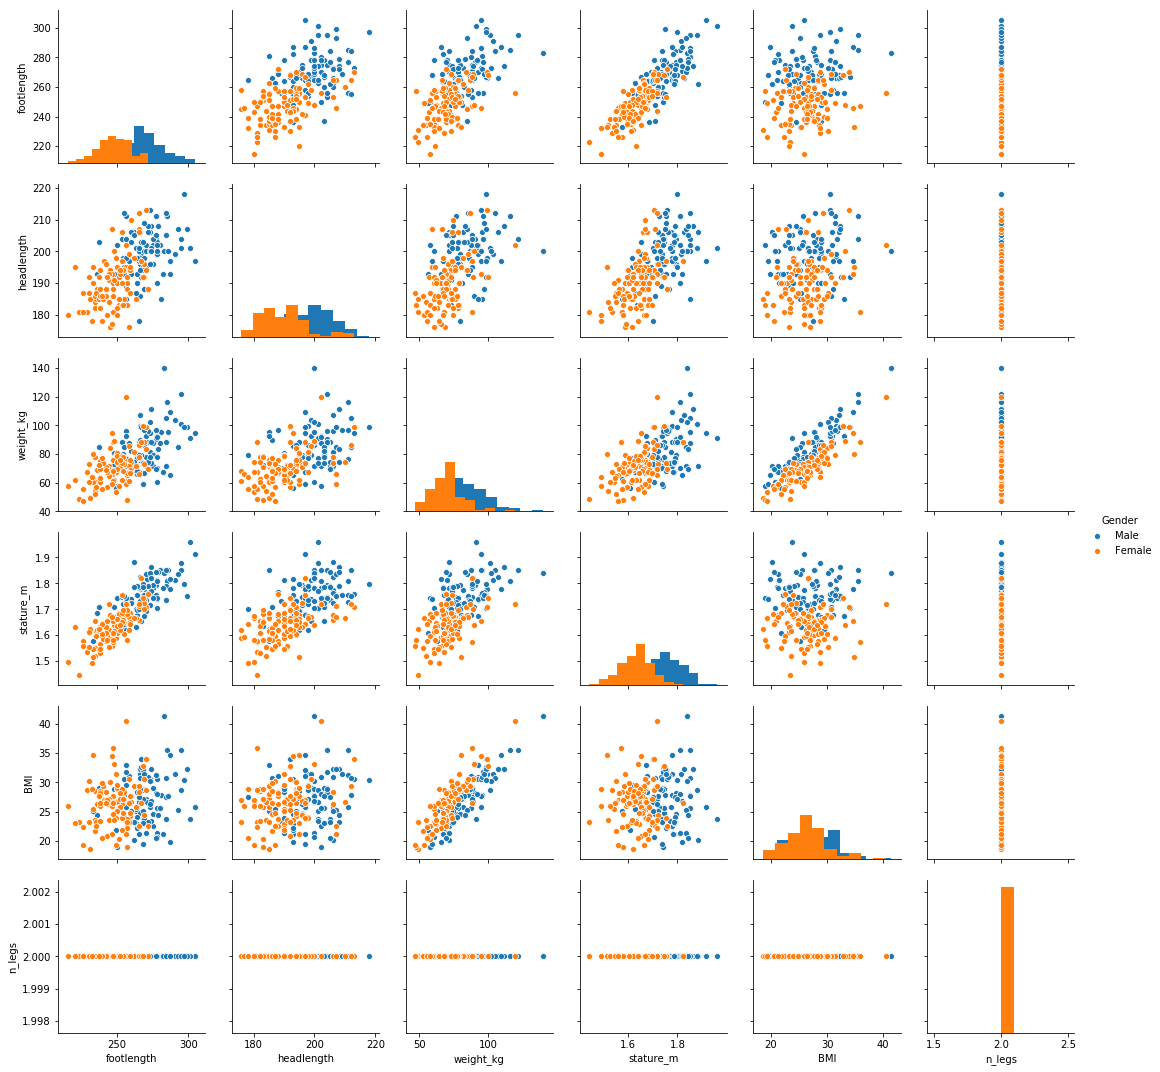

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(ansur_df, hue='Gender', diag_kind='hist')
plt.show()

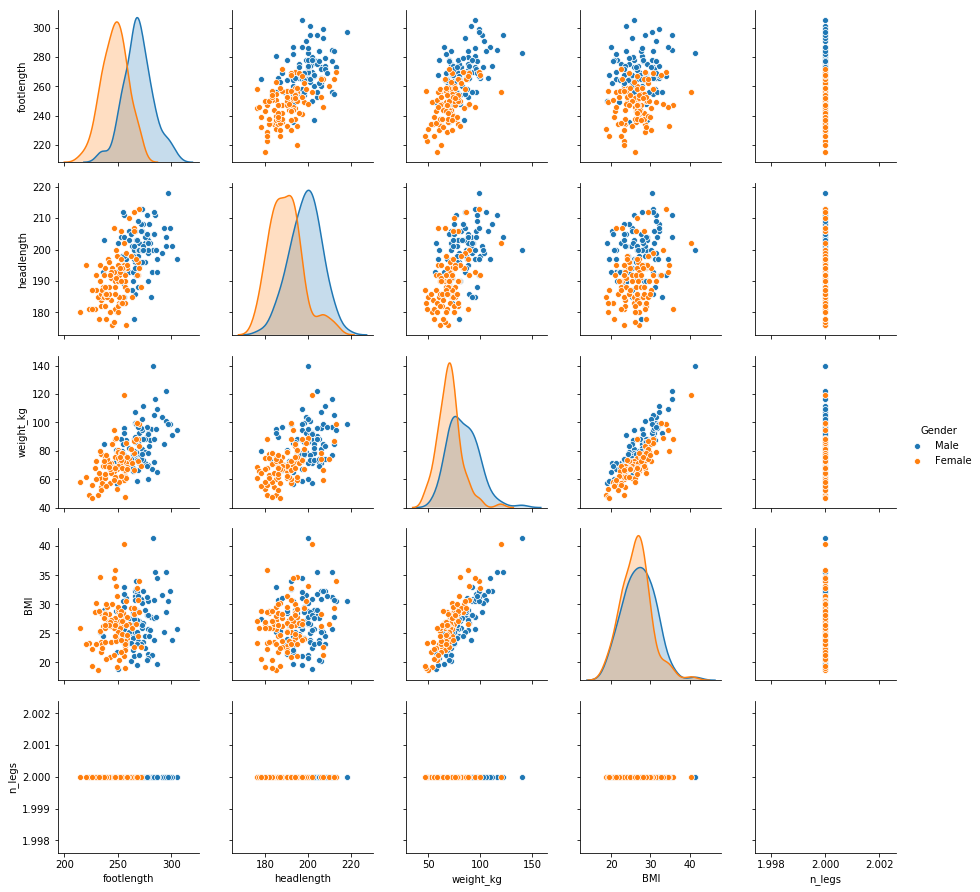

In [11]:
# drop a feature and see relationships
reduced_df = ansur_df.drop("stature_m", axis=1)

sns.pairplot(reduced_df, hue='Gender')
plt.show()

#### TSNE

In [12]:
from sklearn.manifold import TSNE

tsne_df = pd.concat(map(pd.read_csv, [MALE_PATH, FEMALE_PATH]))

non_numeric = ['Branch',\
               'Gender',\
               'Component',\
               'weight_kg',\
               'stature_m',\
               'BMI',\
               'BMI_class',\
               'Height_class']

df_numeric = tsne_df.drop(non_numeric, axis=1)

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


In [13]:
tsne_df.shape

(6068, 99)

In [14]:
tsne_df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


#### visualize tsne

In [15]:
tsne_map_df = pd.DataFrame(tsne_features, columns=['x', 'y'])

In [16]:
tsne_map_df.reset_index(inplace=True, drop=True) # reset index
tsne_df.reset_index(inplace=True, drop=True) # reset index

In [17]:
tsne_map_df.shape

(6068, 2)

In [18]:
visualize_tsne_df = pd.concat([tsne_df, tsne_map_df], axis=1)

In [19]:
visualize_tsne_df.shape

(6068, 101)

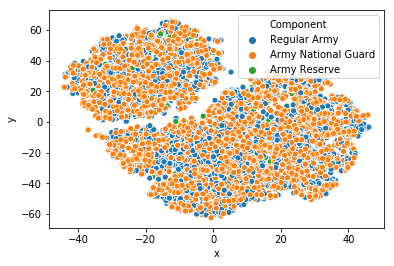

In [20]:
sns.scatterplot(x="x", y="y", hue="Component", data=visualize_tsne_df)
plt.show()

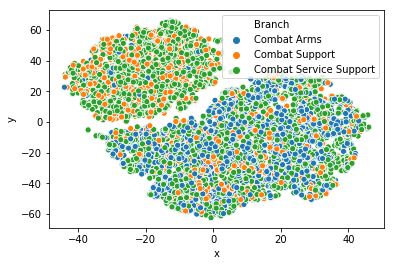

In [21]:
sns.scatterplot(x="x", y="y", hue="Branch", data=visualize_tsne_df)
plt.show()

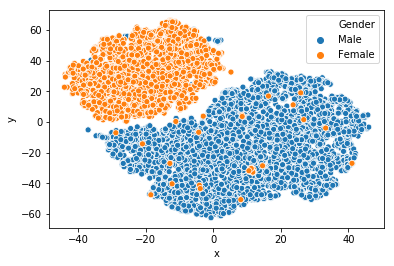

In [22]:
sns.scatterplot(x="x", y="y", hue="Gender", data=visualize_tsne_df)
plt.show()

## _2. Feature Selection I, Selecting for Feature Information_:
-  models tend to overfit badly with high dimensional data

#### curse of dimensionality:
-  large number of columns in dataset cause overfitting
-  unable to generalize patterns in the data due to too many features

#### overfitting:
-  model performs well on training set but bad on testing set
-  solution to fix => dimensionality reduction techniques

#### feature selection techniques that help prevent overfitting:
-  1.) remove features with low variance via threshold after normalization (ex: 0.005)
-  2.) remove columns with too many missing values
-  3.) remove highly correlated features (-1 and 1) ***should only be done if you are familiar with dataset's domain understanding otherwise use feature extraction techniques that dynamically remove correlated features***

#### train/test split

In [23]:
MALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_MALE.csv"
ansur_male_df = pd.read_csv(MALE_PATH)[:500]
ansur_male_df = ansur_male_df.iloc[:, :-5]
ansur_male_df = ansur_male_df.iloc[:, 2:]


FEMALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_FEMALE.csv"
ansur_female_df = pd.read_csv(FEMALE_PATH)[:500]
ansur_female_df = ansur_female_df.iloc[:, :-5]
ansur_female_df = ansur_female_df.iloc[:, 2:]

ansur_features_df = pd.concat([ansur_male_df, ansur_female_df])

In [24]:
ansur_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 92 columns):
Gender                            1000 non-null object
abdominalextensiondepthsitting    1000 non-null int64
acromialheight                    1000 non-null int64
acromionradialelength             1000 non-null int64
anklecircumference                1000 non-null int64
axillaheight                      1000 non-null int64
balloffootcircumference           1000 non-null int64
balloffootlength                  1000 non-null int64
biacromialbreadth                 1000 non-null int64
bicepscircumferenceflexed         1000 non-null int64
bicristalbreadth                  1000 non-null int64
bideltoidbreadth                  1000 non-null int64
bimalleolarbreadth                1000 non-null int64
bitragionchinarc                  1000 non-null int64
bitragionsubmandibulararc         1000 non-null int64
bizygomaticbreadth                1000 non-null int64
buttockcircumference         

In [25]:
from sklearn.model_selection import train_test_split

y = ansur_features_df['Gender']
X = ansur_features_df.drop('Gender', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


#### fit/test model - overfitting

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

48.7% accuracy on test set vs. 100.0% on training set


#### fit/test model w/ dimensionality reduction techniques (1 feature)

In [27]:
X = ansur_features_df[['neckcircumferencebase']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.7% accuracy on test set vs. 94.3% on training set


#### variance threshold

In [28]:
head_df = ansur_features_df[["headbreadth",\
                             "headcircumference",\
                             "headlength",\
                             "tragiontopofhead"]]

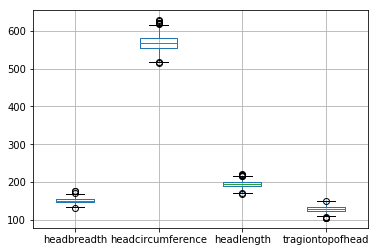

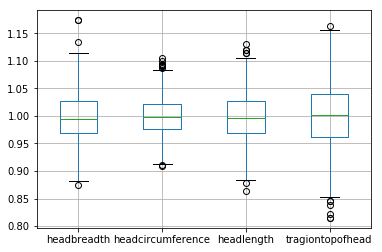

headbreadth          0.001798
headcircumference    0.001104
headlength           0.001978
tragiontopofhead     0.003441
dtype: float64


In [29]:
head_df.boxplot()
plt.show()

normalized_df = head_df / head_df.mean() # normalize data
normalized_df.boxplot()
plt.show()

print(normalized_df.var())

#### drop features w/ low variance based on threshold value

In [30]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.002) # threshold

sel.fit(head_df / head_df.mean()) # fit on normalized dataset

mask = sel.get_support() # boolean mask

reduced_df = head_df.loc[:, mask] # apply mask
print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 1.


#### remove features w/ too many missing values

In [31]:
PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/Public_Schools2.csv"
school_df = pd.read_csv(PATH)

In [32]:
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [33]:
school_df.isna().sum() / len(school_df)

# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5
reduced_df = school_df.loc[:, mask] # apply mask

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


#### correlation

In [34]:
corr_df = ansur_features_df[["elbowrestheight",\
                   "wristcircumference",\
                   "anklecircumference",\
                   "buttockheight",\
                   "crotchheight"]]

corr_df.corr()

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
elbowrestheight,1.000000,0.340377,0.330579,0.035733,0.016699
wristcircumference,0.340377,1.000000,0.704088,0.679921,0.696637
anklecircumference,0.330579,0.704088,1.000000,0.451990,0.439377
buttockheight,0.035733,0.679921,0.451990,1.000000,0.947380
crotchheight,0.016699,0.696637,0.439377,0.947380,1.000000


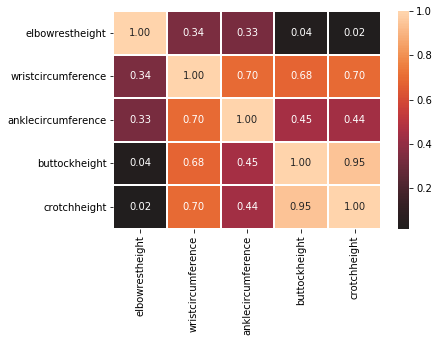

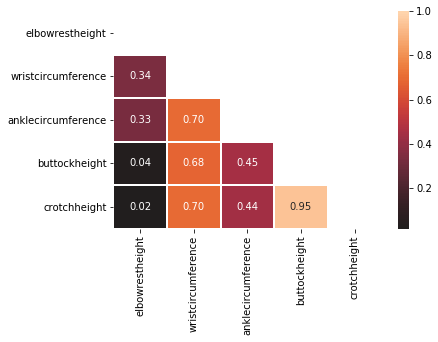

In [35]:
import numpy as np

corr = corr_df.corr()

sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

corr = corr_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### remove highly correlated features

In [36]:
MALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_MALE.csv"
ansur_male_df = pd.read_csv(MALE_PATH)

FEMALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_FEMALE.csv"
ansur_female_df = pd.read_csv(FEMALE_PATH)

ansur_raw_features_df = pd.concat([ansur_male_df, ansur_female_df])

In [37]:
corr_matrix = ansur_raw_features_df.corr().abs() # calculate corr matrix w/ absolute value

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # TRUE/FALSE MASK
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
reduced_df = ansur_raw_features_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 80 columns


## _3. Feature selection II, Selecting for Model Accuracy_:

#### recursive feature elimination [rfe]:
-  feature selection algorithm

#### random forest:
-  ensemble learning algorithm
-  has feature importance class

#### lasso regression:
-  shrinks irrelevant features to zero
-  **_alpha_** regularization parameter to avoid overfitting and make model generalize better to unseen data

#### classifier

In [38]:
PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/PimaIndians.csv"
diabetes_df = pd.read_csv(PATH)

In [39]:
diabetes_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [40]:
X_full = diabetes_df.drop('test', axis=1)
y = diabetes_df["test"]

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25)
X_train_std = scaler.fit_transform(X_train)

lr.fit(X_train_std, y_train)
X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X_full.columns, abs(lr.coef_[0]).round(2))))

73.5% accuracy on test set.
{'pregnant': 0.08, 'glucose': 1.25, 'diastolic': 0.1, 'triceps': 0.08, 'insulin': 0.3, 'bmi': 0.37, 'family': 0.52, 'age': 0.47}


#### manual recursive feature elimination

In [42]:
# Remove the 2 features with the lowest model coefficient
X_sub = diabetes_df[['pregnant', 'glucose', 'triceps', 'bmi', 'family']]

X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.25, random_state=0)

lr.fit(scaler.fit_transform(X_train), y_train)

acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X_sub.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.26, 'glucose': 1.18, 'triceps': 0.28, 'bmi': 0.33, 'family': 0.36}


In [43]:
# Only keep the feature with the highest coefficient
X_single = diabetes_df[['glucose']]

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.25, random_state=0)

lr.fit(scaler.fit_transform(X_train), y_train)

acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X_single.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.27}


#### automatic recursive feature elimination

In [44]:
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25)
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X_full.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X_full.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 3, 'diastolic': 2, 'triceps': 4, 'insulin': 6, 'bmi': 1, 'family': 1, 'age': 5}
Index(['pregnant', 'bmi', 'family'], dtype='object')
76.5% accuracy on test set.


#### random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=0)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

acc = accuracy_score(y_test, rf.predict(X_test))

print(dict(zip(X_full.columns, rf.feature_importances_.round(2)))) # feature importances
print("{0:.1%} accuracy on test set.".format(acc)) 

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


#### random forest feature selection

In [46]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

print(mask)

# Apply the mask to the feature dataset X
reduced_X = X_full.loc[:, mask]

print(reduced_X.columns)

[False  True False False False False False  True]
Index(['glucose', 'age'], dtype='object')


#### random forest w/ recursive feature elimination

In [47]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)
rfe.fit(X_train, y_train)
mask = rfe.support_

reduced_X = X_full.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'bmi'], dtype='object')


#### lasso regressor

In [48]:
MALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_MALE.csv"
ansur_male_df = pd.read_csv(MALE_PATH)


FEMALE_PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/ANSUR_II_FEMALE.csv"
ansur_female_df = pd.read_csv(FEMALE_PATH)

ansur_features_df = pd.concat([ansur_male_df, ansur_female_df])

In [49]:
X = ansur_features_df.drop(["Branch",\
                           "Component",\
                           "Gender",\
                           "weight_kg",\
                           "stature_m",\
                           "BMI_class",\
                           "Height_class",\
                           "BMI"], axis=1)

y = ansur_features_df["BMI"]

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_std = scaler.fit_transform(X_train)

la = Lasso()

la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 82.9% of the variance in the test set.
The model has ignored 81 out of 91 features.


#### adjust regularization alpha

In [51]:
la = Lasso(alpha=0.1, random_state=0)

la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 97.8% of the variance in the test set.
68 out of 91 features were ignored.


#### lasso cv

In [52]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(tol=.001)
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.406
The model explains 98.6% of the test set variance
41 features out of 91 selected


#### ensemble methods (random forest, gradient boosting)

In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 91 features.
Fitting estimator with 88 features.
Fitting estimator with 85 features.
Fitting estimator with 82 features.
Fitting estimator with 79 features.
Fitting estimator with 76 features.
Fitting estimator with 73 features.
Fitting estimator with 70 features.
Fitting estimator with 67 features.
Fitting estimator with 64 features.
Fitting estimator with 61 features.
Fitting estimator with 58 features.
Fitting estimator with 55 features.
Fitting estimator with 52 features.
Fitting estimator with 49 features.
Fitting estimator with 46 features.
Fitting estimator with 43 features.
Fitting estimator with 40 features.
Fitting estimator with 37 features.
Fitting estimator with 34 features.
Fitting estimator with 31 features.
Fitting estimator with 28 features.
Fitting estimator with 25 features.
Fitting estimator with 22 features.
Fitting estimator with 19 features.
Fitting estimator with 16 features.
Fitting estimator with 13 features.
The model can explain 95.9% 

In [54]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=5, verbose=1)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

Fitting estimator with 91 features.
Fitting estimator with 86 features.
Fitting estimator with 81 features.
Fitting estimator with 76 features.
Fitting estimator with 71 features.
Fitting estimator with 66 features.
Fitting estimator with 61 features.
Fitting estimator with 56 features.
Fitting estimator with 51 features.
Fitting estimator with 46 features.
Fitting estimator with 41 features.
Fitting estimator with 36 features.
Fitting estimator with 31 features.
Fitting estimator with 26 features.
Fitting estimator with 21 features.
Fitting estimator with 16 features.
Fitting estimator with 11 features.


#### combine and compare models

In [56]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

lm = LinearRegression()

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 96.4% of the variance in the test set using 6 features.


## _4. Feature Extraction_:
-  manual feature selection
-  PCA

#### manual feature extraction

In [57]:
PATH = "/Users/grp/Documents/BIGDATA/DATACAMP/otherCourses/dimred/grocery_sales.csv"

sales_df = pd.read_csv(PATH)

sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [58]:
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

reduced_df.head()

,storeID,product,price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020
3,B,Apples,5.143417
4,B,Bananas,3.898517


In [59]:
"""
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)
print(reduced_df.head())
"""

"\nheight_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)\nreduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)\nprint(reduced_df.head())\n"

#### calculate principal components

In [60]:
ansur_pca_df = ansur_features_df[["wristheight", "buttockheight", "waistcircumference", "shouldercircumference"]]

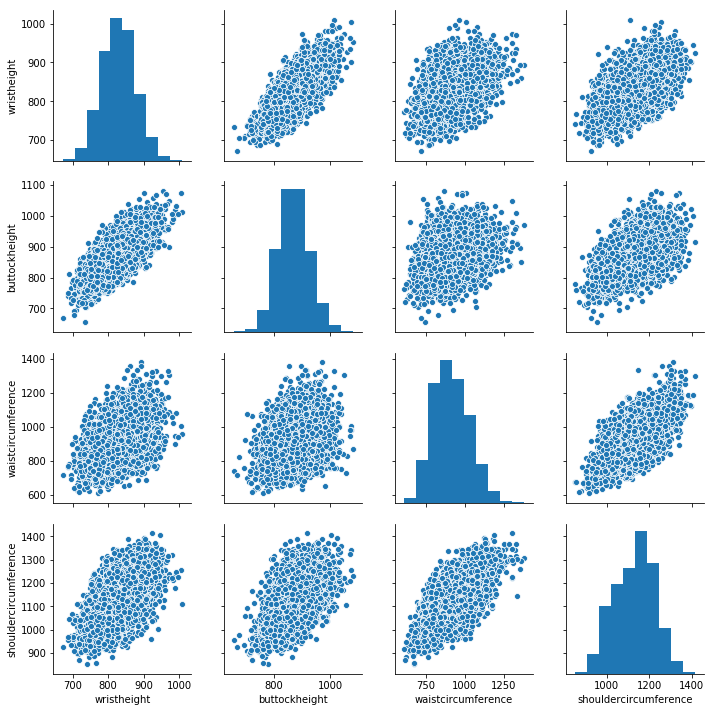

In [61]:
sns.pairplot(ansur_pca_df)

plt.show()

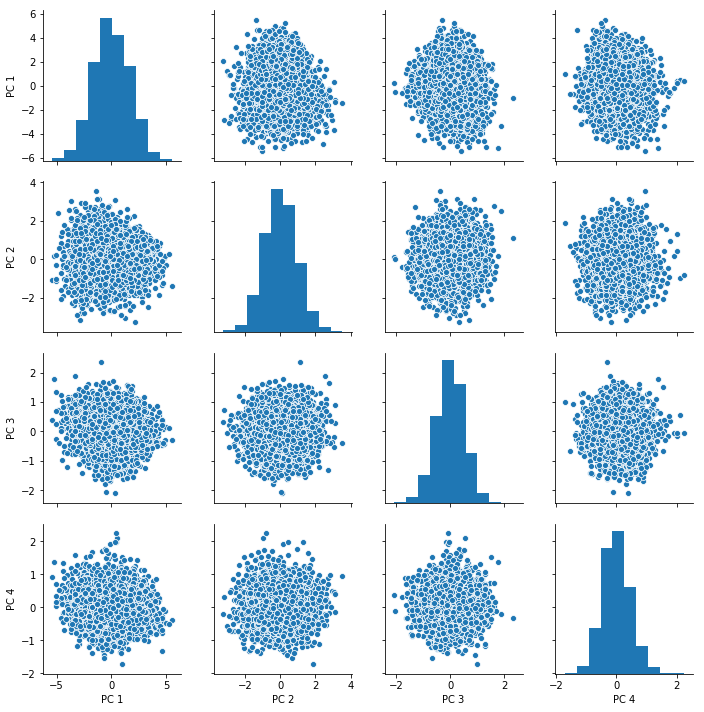

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_pca_df)

pca = PCA()
pc = pca.fit_transform(ansur_std)

pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

sns.pairplot(pc_df)
plt.show()

In [63]:
pc_df.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.557300,0.106734,0.120953,-0.149873
1,0.400394,0.195269,-0.248090,0.063707
2,-1.320246,-0.414591,-1.041536,-0.026507
3,0.924502,-0.495030,-0.674396,-0.428859
4,-3.656950,3.027187,-0.190305,0.460265


#### pca on larger dataset

In [64]:
ansur_dims_pca_df = ansur_features_df.drop(["Branch",\
                              "Component",\
                              "Gender",\
                              "BMI_class",\
                              "Height_class"], axis=1)

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_dims_pca_df)

pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### inspect pca explained variance

In [66]:
# Inspect the explained variance ratio per component
pca.explained_variance_ratio_

array([5.56363311e-01, 1.30884134e-01, 5.07999670e-02, 3.15841769e-02,
       2.10366372e-02, 1.60557326e-02, 1.36837911e-02, 1.14965645e-02,
       1.09549376e-02, 9.79631899e-03, 9.44852401e-03, 8.72551080e-03,
       6.71987242e-03, 6.42825493e-03, 6.39432700e-03, 6.04392630e-03,
       5.77611845e-03, 5.68981048e-03, 5.22906086e-03, 4.81645074e-03,
       4.40182008e-03, 4.31344239e-03, 4.12651012e-03, 3.81708218e-03,
       3.68569425e-03, 3.33675568e-03, 3.27646223e-03, 2.85246914e-03,
       2.83355001e-03, 2.71736044e-03, 2.53200136e-03, 2.30390590e-03,
       2.13355271e-03, 2.04753262e-03, 1.95629453e-03, 1.93934442e-03,
       1.86082547e-03, 1.73854807e-03, 1.63722727e-03, 1.50201306e-03,
       1.47031331e-03, 1.41216297e-03, 1.28840585e-03, 1.27495046e-03,
       1.19578587e-03, 1.11417170e-03, 1.07828908e-03, 1.06858499e-03,
       1.00999149e-03, 9.71596079e-04, 9.16195957e-04, 8.71194367e-04,
       8.37380124e-04, 7.31829374e-04, 6.88790562e-04, 6.75821403e-04,
      

In [67]:
# Print the cumulative sum of the explained variance ratio
pca.explained_variance_ratio_.cumsum() # 21 principal components would explain 90% of variance in dataset

array([0.55636331, 0.68724745, 0.73804741, 0.76963159, 0.79066823,
       0.80672396, 0.82040775, 0.83190431, 0.84285925, 0.85265557,
       0.8621041 , 0.87082961, 0.87754948, 0.88397773, 0.89037206,
       0.89641599, 0.90219211, 0.90788192, 0.91311098, 0.91792743,
       0.92232925, 0.92664269, 0.9307692 , 0.93458628, 0.93827198,
       0.94160873, 0.94488519, 0.94773766, 0.95057121, 0.95328857,
       0.95582057, 0.95812448, 0.96025803, 0.96230557, 0.96426186,
       0.96620121, 0.96806203, 0.96980058, 0.97143781, 0.97293982,
       0.97441013, 0.9758223 , 0.9771107 , 0.97838565, 0.97958144,
       0.98069561, 0.9817739 , 0.98284248, 0.98385247, 0.98482407,
       0.98574027, 0.98661146, 0.98744884, 0.98818067, 0.98886946,
       0.98954528, 0.99019665, 0.99082151, 0.99139012, 0.99191973,
       0.99244233, 0.99293494, 0.99338531, 0.99380104, 0.99419485,
       0.99458442, 0.99495282, 0.99529412, 0.99561598, 0.99592718,
       0.9962339 , 0.99653595, 0.99680951, 0.99707569, 0.99732

#### interpret components

In [68]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [69]:
poke_num_df = pokemon_df.drop(["#", "Total", "Name", "Type 1", "Type 2", "Generation", "Legendary"], axis=1)
poke_cat_df = pokemon_df[["Type 1", "Legendary"]].copy()

In [70]:
poke_num_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [71]:
poke_cat_df.head()

,Type 1,Legendary
0,Grass,False
1,Grass,False
2,Grass,False
3,Grass,False
4,Fire,False


In [73]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

pipe.fit(poke_num_df)
vectors = pipe.steps[1][1].components_.round(2) # extract components

print('PC 1 effects = ' + str(dict(zip(poke_num_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_num_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


#### visualize components

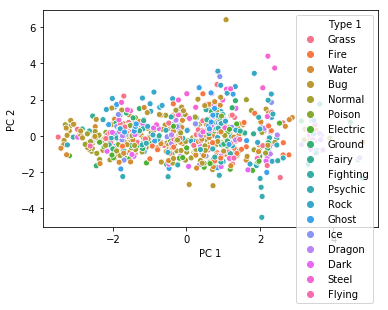

In [74]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

pc = pipe.fit_transform(poke_num_df)

poke_cat_df['PC 1'] = pc[:, 0] # add 1st component to cat df
poke_cat_df['PC 2'] = pc[:, 1] # add 2nd component to cat df

sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

#### input pca as features to learning algorithm

In [75]:
poke_cols_df = pokemon_df.drop(["#", "Total", "Name", "Type 1", "Type 2", "Generation"], axis=1)

X = poke_cols_df.drop("Legendary", axis=1)
y = poke_cols_df["Legendary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)

print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.46337833 0.18266838 0.12796357]
94.0% test set accuracy


#### preserve percentage of variance

In [76]:
ansur_dims_pca_df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034


In [77]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.9))])

pipe.fit(ansur_dims_pca_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

# Let PCA select 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.8))])

pipe.fit(ansur_dims_pca_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

17 components selected
6 components selected


#### pca elbow method

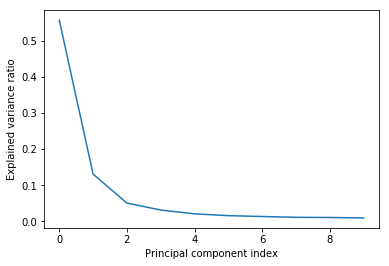

In [78]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

pipe.fit(ansur_dims_pca_df)

plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

#### convert pca features back to original features

In [79]:
"""
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)
"""

'\n# Transform the input data to principal components\npc = pipe.transform(X_test)\n\n# Inverse transform the components to original feature space\nX_rebuilt = pipe.inverse_transform(pc)\n\n# Plot the reconstructed data\nplot_digits(X_rebuilt)\n'

### grp